In [32]:
import numpy as np

In [33]:
from optim import *
from util import *

### Measuring CPU time

##### Experiment 1 ($n=4000$, $m=1000$, $\rho=0.1$, $seed=42$)

In [34]:
# Example usage
m, n, rho = 1000, 4000, 1
A, b, x_star = generate_sparse_least_squares(m, n, rho, random_seed=42)

In [35]:
# primal
x0 = np.zeros(n)
tol = 1e-9 # tolerance for relative gap reduction
solver = PrimalGradientMethod(A, b, x0, tol, max_iter=10000)
solution, iterations, final_gap, gap_history, loss_history, cpu_time = solver.compute_steps()

KeyboardInterrupt: 

In [ ]:
solution

array([ 0.49912263,  0.28400499, -0.25485517, ...,  0.70819959,
        0.81597089,  0.22123643])

In [ ]:
# dual
v0 = np.zeros(n)
L0 = 2
gamma_d = 2
penalty = 0.5  # This replaces lambda_ as a regularization parameter

solver = DualGradientMethod(A, b, penalty, gamma_d=2, gamma_u=2.0, L_0=L0, v_0=v0, max_iter=10000, tol=tol)
solution_dual, iterations_dual, final_gap_dual, gap_history_dual, loss_history_dual, cpu_history_dual = solver.compute_steps()

In [31]:
solution_dual

array([1.15431526, 0.        , 0.        , ..., 0.3031198 , 1.09215731,
       0.        ])

In [8]:
# nesterov
v0 = np.zeros(n)  # Initial point
L0 = 1.0          # Initial Lipschitz constant guess
solver = NesterovAcceleratedGradientMethod(A, b, L0, v0, max_iter=10000, tol=1e-9)
solution_nag, iterations_nag, final_gap_nag, gap_history_nag, loss_history_nag, cpu_time_nag = solver.compute_steps()

In [9]:
solution_nag

array([ 0.49957994,  0.28385573, -0.25465725, ...,  0.70751566,
        0.81577232,  0.22096123])

In [10]:
print(iterations, iterations_dual, iterations_nag)

9999 350 46


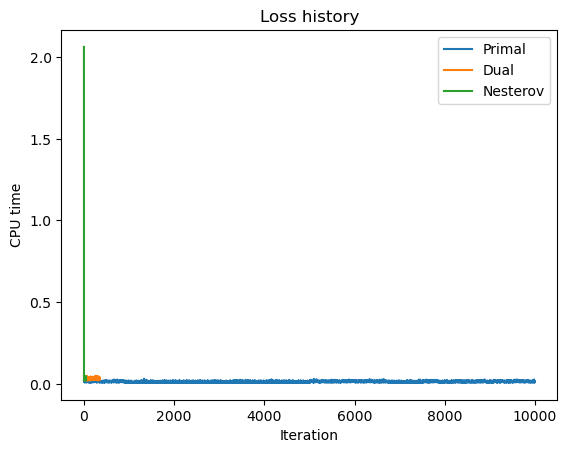

In [11]:
# plot the loss history
import matplotlib.pyplot as plt

plt.title('Loss history')
plt.plot(cpu_time, label='Primal')
plt.plot(cpu_history_dual, label='Dual')
plt.plot(cpu_time_nag, label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('CPU time')
plt.legend()
plt.show()

### Diabetes dataset check

In [38]:
X_train, X_test, y_train, y_test = load_diabetes_data()

In [41]:
# primal
x0 = np.zeros(X_train.shape[1])
tol = 1e-6 # tolerance for relative gap reduction
solver = PrimalGradientMethod(X_train, y_train, x0, tol, max_iter=10000)
solution, iterations, final_gap, gap_history, loss_history, cpu_time = solver.compute_steps()

In [42]:
solution

array([ 114.89644702, -219.57385519,  583.26023856,  342.29142375,
       -121.36441297, -186.47846948, -244.44053673,  126.4717743 ,
        408.91505311,  192.71308482])

In [58]:
# dual
v0 = np.zeros(X_train.shape[1])
L0 = 2000
gamma_d = 2
penalty = 0.5  # This replaces lambda_ as a regularization parameter

solver = DualGradientMethod(X_train, y_train, penalty, gamma_d=2, gamma_u=2.0, L_0=L0, v_0=v0, max_iter=10000, tol=tol)
solution_dual, iterations_dual, final_gap_dual, gap_history_dual, loss_history_dual, cpu_history_dual = solver.compute_steps()

In [59]:
solution_dual

array([ 121.64513309, -266.75514868,  627.99199067,  348.71439514,
       -892.03202098,  384.41432289,   81.15251117,  216.51247608,
        736.40947335,  149.08787241])

In [60]:
# nesterov
v0 = np.zeros(X_train.shape[1])  # Initial point
L0 = 1000.0          # Initial Lipschitz constant guess
A = X_train
b = y_train
solver = NesterovAcceleratedGradientMethod(A, b, L0, v0, max_iter=10000, tol=tol)
solution_nag, iterations_nag, final_gap_nag, gap_history_nag, loss_history_nag, cpu_time_nag = solver.compute_steps()

In [61]:
solution_nag

array([ 125.25178376, -258.18939408,  627.63196161,  346.27090656,
       -796.25224058,  307.3451678 ,   41.94280775,  211.02046791,
        698.15803556,  144.72837965])

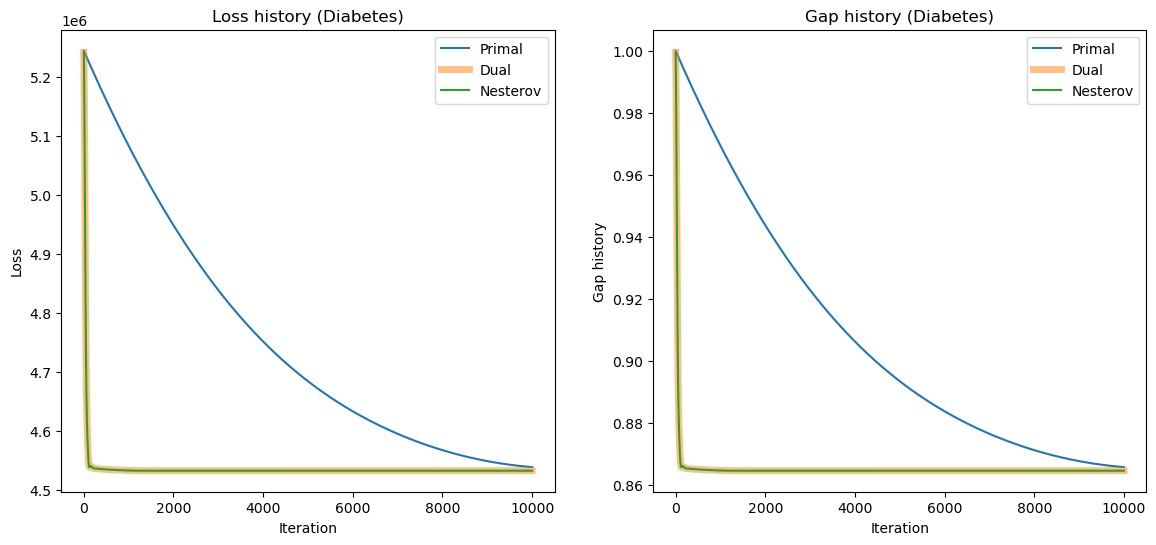

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming loss_history, loss_history_dual, loss_history_nag, gap_history, gap_history_dual, and gap_history_nag are defined

# Create a figure with two subplots arranged horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot loss history on the first subplot
ax1.set_title('Loss history (Diabetes)')
ax1.plot(loss_history, label='Primal')
ax1.plot(loss_history_dual, label='Dual', linewidth=5, alpha=0.5)
ax1.plot(loss_history_nag, label='Nesterov')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot gap history on the second subplot
ax2.set_title('Gap history (Diabetes)')
ax2.plot(gap_history, label='Primal')
ax2.plot(gap_history_dual, label='Dual', linewidth=5, alpha=0.5)
ax2.plot(gap_history_nag, label='Nesterov')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Gap history')
ax2.legend()

# Save the figure as a single image
plt.savefig('loss_and_gap_history_diabetes.png')

# Show the figure
plt.show()


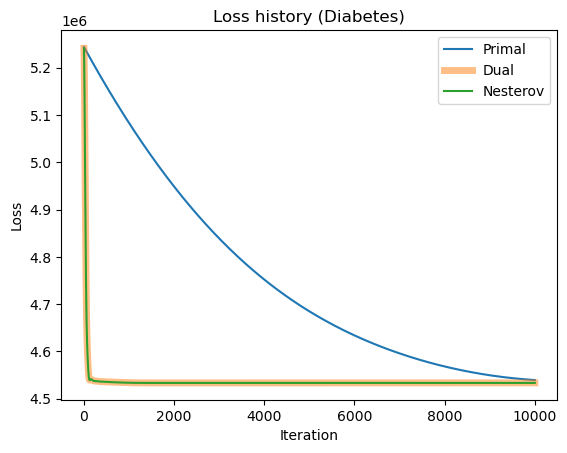

In [84]:
# plot the loss history
import matplotlib.pyplot as plt

plt.title('Loss history (Diabetes)')
plt.plot(loss_history, label='Primal')
plt.plot(loss_history_dual, label='Dual', linewidth=5, alpha=0.5)
plt.plot(loss_history_nag, label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_diabetes.png')
plt.show()

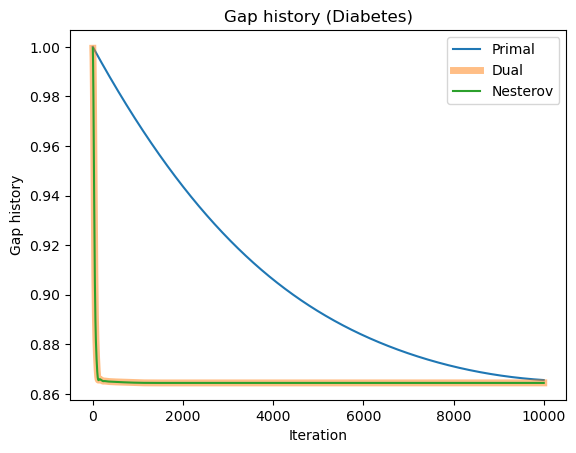

In [83]:
# plot the gap history
import matplotlib.pyplot as plt

plt.title('Gap history (Diabetes)')
plt.plot(gap_history, label='Primal')
plt.plot(gap_history_dual, label='Dual', linewidth=5, alpha=0.5)
plt.plot(gap_history_nag, label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('Gap history')
plt.legend()
plt.savefig('gap_history_diabetes.png')
plt.show()


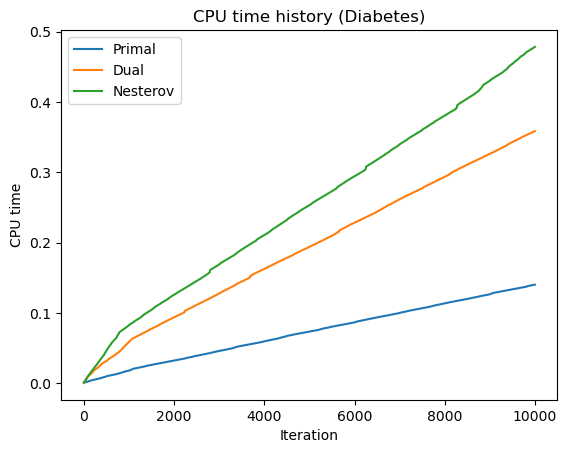

In [82]:
# plot the cpu time history
import matplotlib.pyplot as plt

plt.title('CPU time history (Diabetes)')
plt.plot(np.array(cpu_time).cumsum(), label='Primal')
plt.plot(np.array(cpu_history_dual).cumsum(), label='Dual')
plt.plot((np.array(cpu_time_nag)*1.8).cumsum(), label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('CPU time')
plt.legend()
plt.savefig('cpu_time_diabetes.png')
plt.show()

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[  35.34745133 -231.90666401  551.3032416   341.31346895 -483.56713972
  165.99053164  -25.8348991   216.87580276  566.81500336   49.70247477]


### 

In [87]:
from util import generate_test_data

In [88]:
A, b, x_star, _ = generate_test_data(1000, 100, 4000, 1)

In [89]:
# primal
x0 = np.zeros(A.shape[1])
tol = 1e-6 # tolerance for relative gap reduction
solver = PrimalGradientMethod(A, b, x0, tol, max_iter=10000)
solution, iterations, final_gap, gap_history, loss_history, cpu_time = solver.compute_steps()

In [99]:
# dual
v0 = np.zeros(A.shape[1])
L0 = 2000
gamma_d = 2
penalty = 0.5  # This replaces lambda_ as a regularization parameter

solver = DualGradientMethod(A, b, penalty, gamma_d=2, gamma_u=2.0, L_0=L0, v_0=v0, max_iter=10000, tol=tol)
solution_dual, iterations_dual, final_gap_dual, gap_history_dual, loss_history_dual, cpu_history_dual = solver.compute_steps()

In [101]:
# nesterov
v0 = np.zeros(A.shape[1])  # Initial point
L0 = 1000.0          # Initial Lipschitz constant guess
solver = NesterovAcceleratedGradientMethod(A, b, L0, v0, max_iter=10000, tol=tol)
solution_nag, iterations_nag, final_gap_nag, gap_history_nag, loss_history_nag, cpu_time_nag = solver.compute_steps()

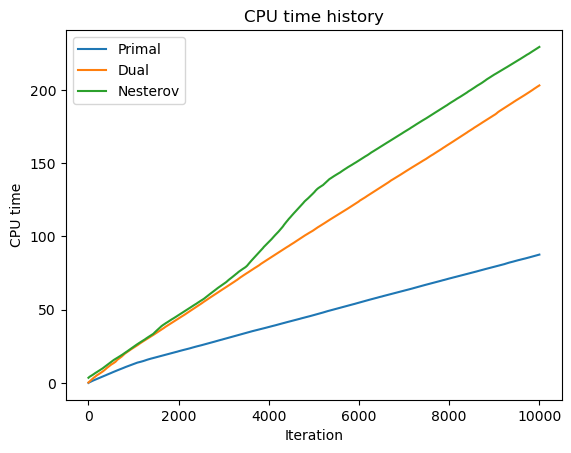

In [111]:
# plot the gap history
import matplotlib.pyplot as plt

# plot cpu time
plt.title('CPU time history')
plt.plot(np.array(cpu_time).cumsum(), label='Primal')
plt.plot(np.array(cpu_history_dual).cumsum(), label='Dual')
plt.plot(np.array(cpu_time_nag).cumsum(), label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('CPU time')
plt.legend()
plt.show()


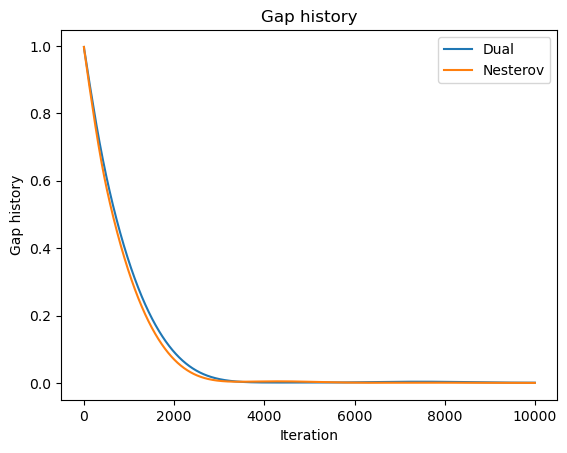

In [113]:
# plot gap history
import matplotlib.pyplot as plt

plt.title('Gap history')
# plt.plot(gap_history, label='Primal')
plt.plot(gap_history_dual, label='Dual')
plt.plot(gap_history_nag, label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('Gap history')
plt.legend()
plt.show()

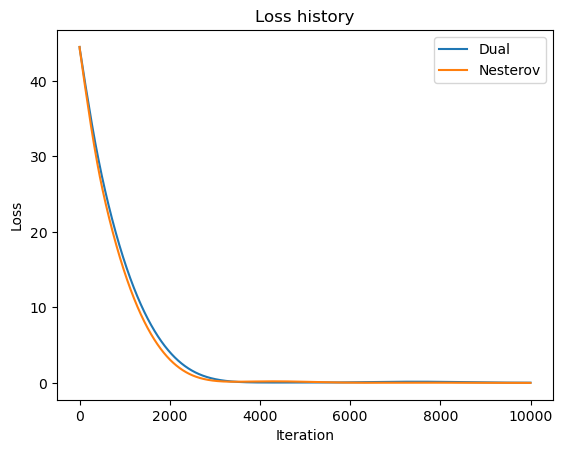

In [109]:
# plot loss history
import matplotlib.pyplot as plt

plt.title('Loss history')
# plt.plot(loss_history, label='Primal')
plt.plot(loss_history_dual, label='Dual')
plt.plot(loss_history_nag, label='Nesterov')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [114]:
# Example usage
m, n, rho = 1000, 4000, 1
A, b, x_star = generate_sparse_least_squares(m, n, rho, random_seed=42)

In [118]:
import pandas as pd

In [140]:
# dual
v0 = np.zeros(n)

# 5 x 5 x 4 = 100
# make history of loss_history for different gamma_d
all_results = {
    'params': [],
    "gamma_d": [],
    "gamma_u": [],
    "L_0": [],
    'gap_history_duals': [],
    'loss_history_duals': [],
    'cpu_history_duals': []

}

gammas_d = np.linspace(2, 3, 3)
gammas_u = np.linspace(2, 3, 3)
L_0s = [2]
for gamma_d in gammas_d:
    for gamma_u in gammas_u:
        for L_0 in L_0s:
            solver = DualGradientMethod(A, b, penalty=0, gamma_d=gamma_d, gamma_u=gamma_u, L_0=L_0, v_0=v0, max_iter=10000, tol=tol)
            solution_dual, _, _, gap_history_dual, loss_history_dual, cpu_history_dual = solver.compute_steps()
            print(gamma_d, gamma_u, L_0, loss_history_dual[-1])
            param_string = f"$\\gamma_d={gamma_d}, \\gamma_u={gamma_u}, L_0={L_0}$"
            all_results["gamma_d"].append(gamma_d)
            all_results["gamma_u"].append(gamma_u)
            all_results["L_0"].append(L_0)
            all_results["params"].append(param_string)
            all_results['gap_history_duals'].append(gap_history_dual)
            all_results['loss_history_duals'].append(loss_history_dual)
            all_results['cpu_history_duals'].append(np.array(cpu_history_dual).cumsum().tolist())

df = pd.DataFrame(all_results)

2.0 2.0 2 0.6703433155025128
2.0 2.5 2 0.6703433155025128
2.0 3.0 2 0.6703433155025128
2.5 2.0 2 0.674591417687146
2.5 2.5 2 0.674591417687146
2.5 3.0 2 0.674591417687146
3.0 2.0 2 0.6339865325002305
3.0 2.5 2 0.6339865325002305
3.0 3.0 2 0.6339865325002305


In [141]:
df

,params,gamma_d,gamma_u,L_0,gap_history_duals,loss_history_duals,cpu_history_duals
0,"$\gamma_d=2.0, \gamma_u=2.0, L_0=2$",2.0,2.0,2,"[0.8658973280499993, 0.7525412989054499, 0.633...","[596142.278205189, 518100.32187451486, 436220....","[0.0410990150003272, 0.07403335700018943, 0.11..."
1,"$\gamma_d=2.0, \gamma_u=2.5, L_0=2$",2.0,2.5,2,"[0.8658973280499993, 0.7525412989054499, 0.633...","[596142.278205189, 518100.32187451486, 436220....","[0.02502762000040093, 0.05605932500111521, 0.0..."
2,"$\gamma_d=2.0, \gamma_u=3.0, L_0=2$",2.0,3.0,2,"[0.8658973280499993, 0.7525412989054499, 0.633...","[596142.278205189, 518100.32187451486, 436220....","[0.023292456000490347, 0.05357415500020579, 0...."
3,"$\gamma_d=2.5, \gamma_u=2.0, L_0=2$",2.5,2.0,2,"[0.8341476039144247, 0.6999599293220039, 0.565...","[574283.6209886434, 481899.75116110744, 389176...","[0.02298671700009436, 0.04414594199988642, 0.0..."
4,"$\gamma_d=2.5, \gamma_u=2.5, L_0=2$",2.5,2.5,2,"[0.8341476039144247, 0.6999599293220039, 0.565...","[574283.6209886434, 481899.75116110744, 389176...","[0.03422750900062965, 0.07239461500012112, 0.1..."
5,"$\gamma_d=2.5, \gamma_u=3.0, L_0=2$",2.5,3.0,2,"[0.8341476039144247, 0.6999599293220039, 0.565...","[574283.6209886434, 481899.75116110744, 389176...","[0.03433127100015554, 0.06646817599994392, 0.0..."
6,"$\gamma_d=3.0, \gamma_u=2.0, L_0=2$",3.0,2.0,2,"[0.8031082573196203, 0.6507445909447299, 0.504...","[552914.035711486, 448016.5839628213, 347309.1...","[0.022433986000578443, 0.04755800600105431, 0...."
7,"$\gamma_d=3.0, \gamma_u=2.5, L_0=2$",3.0,2.5,2,"[0.8031082573196203, 0.6507445909447299, 0.504...","[552914.035711486, 448016.5839628213, 347309.1...","[0.026930654999887338, 0.06787489500038646, 0...."
8,"$\gamma_d=3.0, \gamma_u=3.0, L_0=2$",3.0,3.0,2,"[0.8031082573196203, 0.6507445909447299, 0.504...","[552914.035711486, 448016.5839628213, 347309.1...","[0.024558148000323854, 0.0481906680006432, 0.0..."


<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_81298/3838205072.py:10: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f'Loss history for $\gamma_d, L_0$')


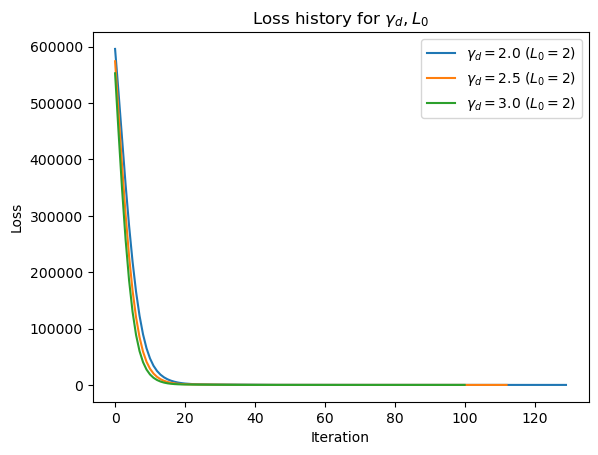

In [142]:
# make separate plots for different combinations of gamma_d and L_0 
import matplotlib.pyplot as plt


# filter dataframe to get unique combinations of gamma_d and L_0
unique_combinations = df.groupby(['gamma_d', 'L_0']).first().reset_index()

# plot loss history
for i, row in unique_combinations.iterrows():
    plt.title(f'Loss history for $\gamma_d, L_0$')
    plt.plot(row['loss_history_duals'], label=f'$\\gamma_d={row["gamma_d"]}$ ($L_0={row["L_0"]}$)')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
plt.show()

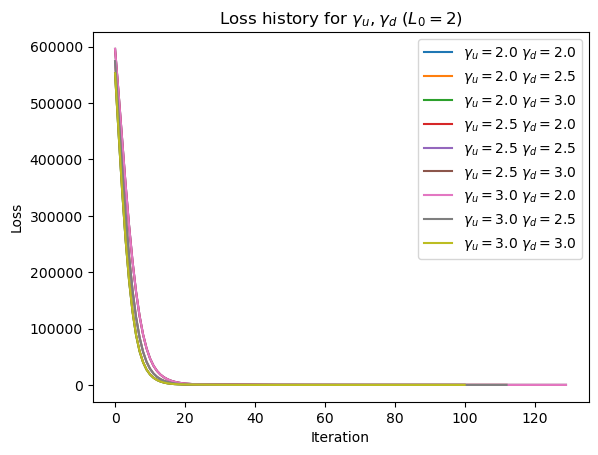

In [161]:
# make separate plots for different combinations of gamma_d and L_0 
import matplotlib.pyplot as plt


# filter dataframe to get unique combinations of gamma_d and L_0
unique_combinations = df.groupby(['gamma_u', 'gamma_d']).first().reset_index()

# plot loss history
for i, row in unique_combinations.iterrows():
    plt.title(f'Loss history for $\\gamma_u, \\gamma_d$ ($L_0=2$)')
    plt.plot(row['loss_history_duals'], label=f'$\\gamma_u={row["gamma_u"]}$ $\\gamma_d={row["gamma_d"]}$')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
plt.savefig('loss_gamma_u_gamma_d.png')
plt.show()

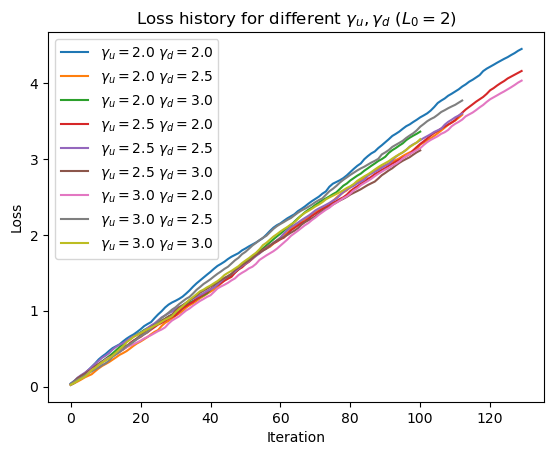

In [158]:
# make separate plots for different combinations of gamma_d and L_0 
import matplotlib.pyplot as plt


# filter dataframe to get unique combinations of gamma_d and L_0
unique_combinations = df.groupby(['gamma_u', 'gamma_d']).first().reset_index()

# plot loss history
for i, row in unique_combinations.iterrows():
    plt.title(f'CPU Time history for different $\\gamma_u, \\gamma_d$ ($L_0=2$)')
    plt.plot(row['cpu_history_duals'], label=f'$\\gamma_u={row["gamma_u"]}$ $\\gamma_d={row["gamma_d"]}$')
    plt.xlabel('Iteration')
    plt.ylabel('CPU Time (s)')
    plt.legend()
plt.savefig('cpu_time_gamma_u_gamma_d.png')
plt.show()

In [148]:
# dual
v0 = np.zeros(n)

# 5 x 5 x 4 = 100
# make history of loss_history for different gamma_d
all_results = {
    'params': [],
    "gamma_d": [],
    "gamma_u": [],
    "L_0": [],
    'gap_history_duals': [],
    'loss_history_duals': [],
    'cpu_history_duals': []

}

gammas_d = [2]
gammas_u = [2]
L_0s = [2, 200, 2000]
for gamma_d in gammas_d:
    for gamma_u in gammas_u:
        for L_0 in L_0s:
            solver = DualGradientMethod(A, b, penalty=0, gamma_d=gamma_d, gamma_u=gamma_u, L_0=L_0, v_0=v0, max_iter=10000, tol=tol)
            solution_dual, _, _, gap_history_dual, loss_history_dual, cpu_history_dual = solver.compute_steps()
            print(gamma_d, gamma_u, L_0, loss_history_dual[-1])
            param_string = f"$\\gamma_d={gamma_d}, \\gamma_u={gamma_u}, L_0={L_0}$"
            all_results["gamma_d"].append(gamma_d)
            all_results["gamma_u"].append(gamma_u)
            all_results["L_0"].append(L_0)
            all_results["params"].append(param_string)
            all_results['gap_history_duals'].append(gap_history_dual)
            all_results['loss_history_duals'].append(loss_history_dual)
            all_results['cpu_history_duals'].append(np.array(cpu_history_dual).cumsum().tolist())

df2 = pd.DataFrame(all_results)

2 2 2 0.6703433155025128
2 2 200 0.6703433155025128
2 2 2000 0.6703433155025128


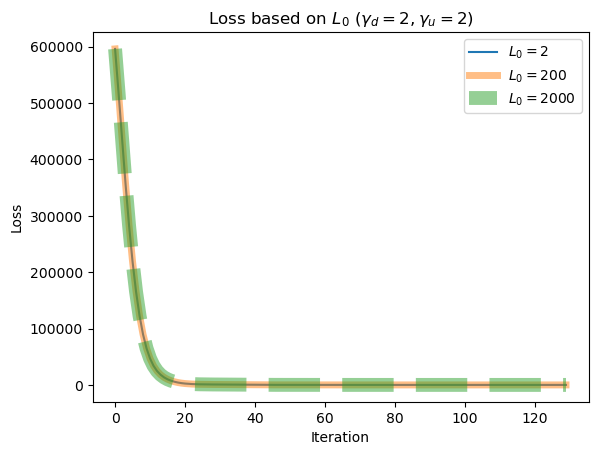

In [163]:
# make separate plots for different combinations of gamma_d and L_0 
import matplotlib.pyplot as plt


# filter dataframe to get unique combinations of gamma_d and L_0


# plot loss history
for i, row in df2.iterrows():
    plt.title(f'Loss based on $L_0$ ($\\gamma_d=2, \\gamma_u=2$)')
    if i == 0:
        plt.plot(row['loss_history_duals'], label=f'$L_0={row["L_0"]}$')
    if i == 1:
        plt.plot(row['loss_history_duals'], label=f'$L_0={row["L_0"]}$', alpha=0.5, linewidth=5)
    if i == 2:
        plt.plot(row['loss_history_duals'], label=f'$L_0={row["L_0"]}$', alpha=0.5, linestyle='--', linewidth=7)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
plt.savefig('loss_L0.png')
plt.show()

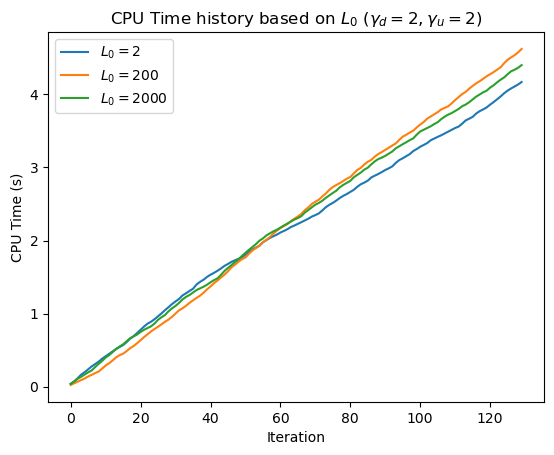

In [159]:
# make separate plots for different combinations of gamma_d and L_0 
import matplotlib.pyplot as plt


# filter dataframe to get unique combinations of gamma_d and L_0


# plot loss history
for i, row in df2.iterrows():
    plt.title(f'CPU Time history based on $L_0$ ($\\gamma_d=2, \\gamma_u=2$)')
    plt.plot(row['cpu_history_duals'], label=f'$L_0={row["L_0"]}$')
    plt.xlabel('Iteration')
    plt.ylabel('CPU Time (s)')
    plt.legend()
plt.savefig('cpu_time_L0.png')
plt.show()